In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_excel('usedcars_noisy.xlsx')

In [28]:
df.head(10)

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,29995,-1,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO
5,2012,SE,17500,8367,White,AUTO
6,2010,SEL,17495,25125,Silver,AUTO
7,2010,SES,0,-1,Silver,AUTO
8,2011,SEL,17000,27393,Blue,AUTO
9,2010,SEL,16995,21026,Silver,AUTO


In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

(array([ 4.,  1.,  1.,  4.,  3., 17., 14., 42., 54., 20.]),
 array([2000. , 2001.2, 2002.4, 2003.6, 2004.8, 2006. , 2007.2, 2008.4,
        2009.6, 2010.8, 2012. ]),
 <BarContainer object of 10 artists>)

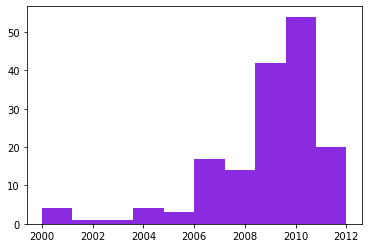

In [30]:
plt.hist(df['year'], color=['blueviolet'])

(array([ 3., 17., 35., 18.,  0., 18., 36.,  5., 27.,  1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

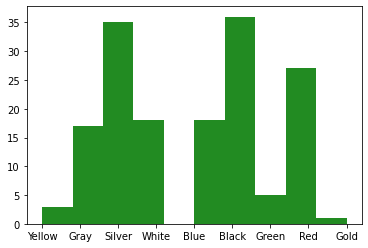

In [31]:
plt.hist(df['color'],color=['forestgreen'])

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

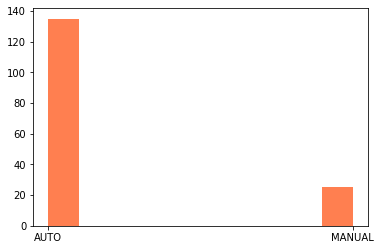

In [32]:
plt.hist(df['transmission'],color=['coral'])

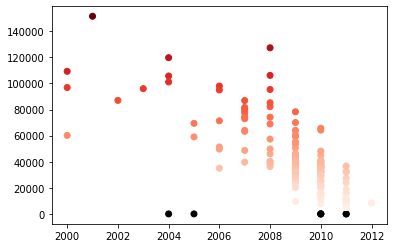

In [33]:
cmap = mpl.cm.get_cmap('Reds').copy()
cmap.set_under(color='black')
plt.scatter(df['year'], df['mileage'], c=df['mileage'], cmap=cmap, vmin=0.000001)

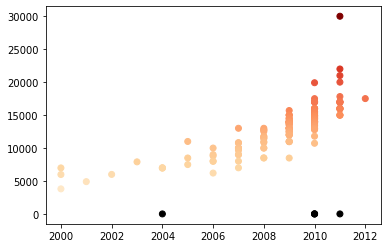

In [34]:
cmap = mpl.cm.get_cmap('OrRd').copy()
cmap.set_under(color='black')
plt.scatter(df['year'], df['price'], c=df['price'], cmap=cmap, vmin=0.000001 )

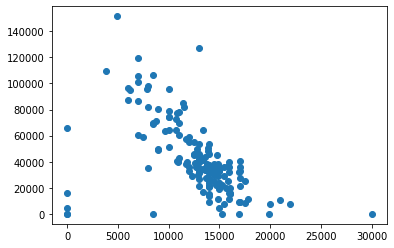

In [35]:
plt.scatter(df['price'], df['mileage'])

(array([26.,  0.,  0.,  0.,  0., 80.,  0.,  0.,  0., 54.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

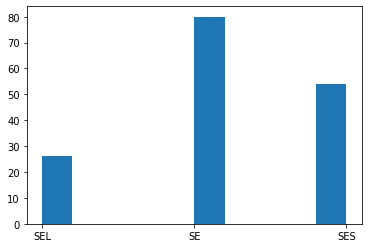

In [36]:
plt.hist(df['model'])

In [37]:
df.dtypes

year             int64
model           object
price            int64
mileage          int64
color           object
transmission    object
dtype: object

In [38]:
df.query('year < 2000')

,year,model,price,mileage,color,transmission


In [39]:
df.query('price < 200')

,year,model,price,mileage,color,transmission
7,2010,SES,0,-1,Silver,AUTO
11,2011,SES,0,4232,Blue,AUTO
33,2010,SEL,0,65636,Black,MANUAL
157,2010,SES,0,16035,Red,MANUAL
159,2004,SE,0,-1,Silver,AUTO


In [40]:
df.query('mileage < 2')

,year,model,price,mileage,color,transmission
2,2011,SEL,29995,-1,Gray,AUTO
7,2010,SES,0,-1,Silver,AUTO
22,2011,SE,16901,-1,White,AUTO
27,2010,SES,15228,-1,Silver,MANUAL
43,2010,SEL,19906,-1,White,AUTO
158,2005,SES,8488,-1,Red,AUTO
159,2004,SE,0,-1,Silver,AUTO


In [41]:
df.isnull().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

In [42]:
print(df['year'].value_counts())
print(df['model'].value_counts())


2010    54
2009    42
2011    19
2008    14
2007    11
2006     6
2004     4
2005     3
2000     3
2012     1
2003     1
2002     1
2001     1
Name: year, dtype: int64
SE     80
SES    54
SEL    26
Name: model, dtype: int64


In [43]:
print(df['color'].value_counts())
print(df['transmission'].value_counts())

Black     36
Silver    35
Red       27
White     18
Blue      18
Gray      17
Green      5
Yellow     3
Gold       1
Name: color, dtype: int64
AUTO      135
MANUAL     25
Name: transmission, dtype: int64


In [44]:
print(df['year'].value_counts().sum())
print(df['model'].value_counts().sum())
print(df['price'].value_counts().sum())
print(df['mileage'].value_counts().sum())
print(df['color'].value_counts().sum())
print(df['transmission'].value_counts().sum())
print(df.value_counts().sum())

160
160
160
160
160
160
160


In [45]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [46]:
df1=df
df1.head(10)

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,29995,-1,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO
5,2012,SE,17500,8367,White,AUTO
6,2010,SEL,17495,25125,Silver,AUTO
7,2010,SES,0,-1,Silver,AUTO
8,2011,SEL,17000,27393,Blue,AUTO
9,2010,SEL,16995,21026,Silver,AUTO


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
df1 = pd.DataFrame(df)
mean_imputer = SimpleImputer(missing_values=0, strategy='mean')
mean_imputer = mean_imputer.fit(df1[['price']])
df1[['price']] = mean_imputer.transform(df1[['price']])
df1.head(10)


,year,model,price,mileage,color,transmission
0,2011,SEL,21992.000000,7413,Yellow,AUTO
1,2011,SEL,20995.000000,10926,Gray,AUTO
2,2011,SEL,29995.000000,-1,Gray,AUTO
3,2011,SEL,19995.000000,7351,Silver,AUTO
4,2011,SEL,17809.000000,11613,Gray,AUTO
5,2012,SE,17500.000000,8367,White,AUTO
6,2010,SEL,17495.000000,25125,Silver,AUTO
7,2010,SES,13127.793548,-1,Silver,AUTO
8,2011,SEL,17000.000000,27393,Blue,AUTO
9,2010,SEL,16995.000000,21026,Silver,AUTO


In [61]:
median_imputer = SimpleImputer(missing_values=-1, strategy='median')
median_imputer = median_imputer.fit(df1[['mileage']])
df1[['mileage']] = median_imputer.transform(df1[['mileage']])
df1.head(10)

,year,model,price,mileage,color,transmission
0,2011,SEL,21992.000000,7413.0,Yellow,AUTO
1,2011,SEL,20995.000000,10926.0,Gray,AUTO
2,2011,SEL,29995.000000,36323.0,Gray,AUTO
3,2011,SEL,19995.000000,7351.0,Silver,AUTO
4,2011,SEL,17809.000000,11613.0,Gray,AUTO
5,2012,SE,17500.000000,8367.0,White,AUTO
6,2010,SEL,17495.000000,25125.0,Silver,AUTO
7,2010,SES,13127.793548,36323.0,Silver,AUTO
8,2011,SEL,17000.000000,27393.0,Blue,AUTO
9,2010,SEL,16995.000000,21026.0,Silver,AUTO


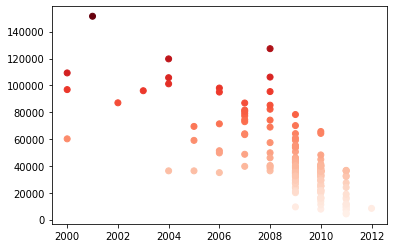

In [62]:
cmap = mpl.cm.get_cmap('Reds').copy()
cmap.set_under(color='black')
plt.scatter(df1['year'], df1['mileage'], c=df1['mileage'], cmap=cmap, vmin=0.000001)

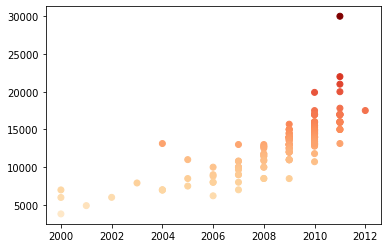

In [63]:
cmap = mpl.cm.get_cmap('OrRd').copy()
cmap.set_under(color='black')
plt.scatter(df1['year'], df1['price'], c=df1['price'], cmap=cmap, vmin=0.000001 )

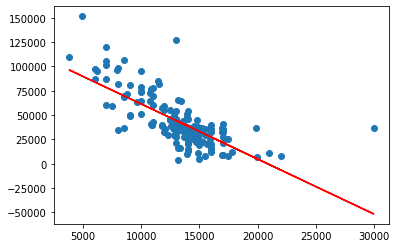

In [68]:
X = df1['price']
y = df1['mileage']
theta = np.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X
# y_line = theta[2] + theta[1] * pow(X, 1) + theta[0] * pow(X, 2)

plt.scatter(X,y)
plt.plot(X, y_line, 'r')
